In [182]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [209]:

# Select the scaffold size : '158' or '400'
sim_size = '400'
conv_constants = np.load("{}x{}_conversion_constants.npz".format(sim_size, sim_size))
# Select cell type: 'granule', 'golgi', 'glomerulus', 'basket', 'dcn', 'purkinje' or 'stellate'
cell_type = ['granule', 'golgi', 'glomerulus', 'basket', 'dcn', 'purkinje', 'stellate']




# folder_name = "casali_spikes_400"
folder_name = "casali_spikes_400_stim_70"
# folder_name = "casali_spikes_400_stim_140"

stim_times = [300, 50, 650]
sim_params = {'argparser':{'timestep':0.1,
                          'stim_times':stim_times,
                          'periodic_stimulus':True,
                          'stim_radius':70}}
simtime = 1000
sim_duration = 1000
all_spikes = {}
# all_spikes['158'] = {k: None for k in cell_type}
all_spikes = {k: None for k in cell_type}
final_connectivity = {k: [] for k in cell_type}
stimulus_information = {
    'f_base': 1,
    'f_peak': 152,
    'stim_times': stim_times
}

all_neurons = {}
# all_neurons['158'] = {
#         "golgi":34,
#         "glomerulus":1111,
#         "granule":13584,
#         "purkinje":9,
#         "basket":96,
#         "stellate":96,
#         "dcn":8 }
# other_recordings = {'v':{}}
all_neurons = conv_constants['all_neurons'].ravel()[0]
nid_offsets = conv_constants['nid_offsets'].ravel()[0]
connectivity = conv_constants['connectivity'].ravel()[0]
for k, v in connectivity.items():
    if v is not None:
        print(k, v.shape)
print("Conn file", conv_constants['connectivity_file'])

print(all_neurons)

print(nid_offsets)
# all_neurons = {
#         "golgi":219,
#         "glomerulus":7070,
#         "granule":88158,
#         "purkinje":69,
#         "basket":603,
#         "stellate":603,
#         "dcn":12}

gj_sc (2411, 4)
glom_goc (14302, 4)
bc_pc (1379, 4)
goc_grc (206092, 4)
gj_bc (2411, 4)
pf_sc (615177, 4)
pf_pc (1957902, 4)
gj_goc (7395, 4)
pc_dcn (314, 4)
aa_goc (79072, 4)
aa_pc (17256, 4)
pf_goc (350399, 4)
sc_pc (1379, 4)
glom_dcn (1763, 4)
pf_bc (604489, 4)
glom_grc (352474, 4)
Conn file datasets/scaffold_full_dcn_400.0x400.0_v3.hdf5
{'basket': 603, 'stellate': 603, 'golgi': 219, 'granule': 88158, 'purkinje': 69, 'glomerulus': 7073, 'dcn': 12}
{'basket': 95519, 'stellate': 96122, 'golgi': 0, 'granule': 7292, 'purkinje': 95450, 'glomerulus': 219, 'dcn': 96725}


In [210]:
np.asarray(None).size

1

In [211]:
all_spikes.keys()

dict_keys(['basket', 'purkinje', 'glomerulus', 'stellate', 'granule', 'golgi', 'dcn'])

In [244]:
def load_v(keys, dir):
    vs = {k: None for k in keys}
    for key in keys:
        print("Key:", key)
        try:
            vs[key] = {'v':np.load(os.path.join(dir, key + "_v.npy"))}
            min_gid =  np.min(vs[key]['v'][:, 0])
            vs[key]['v'][:, 0] -= min_gid
            print("\tmin GID", np.min(vs[key]['v'][:, 0]))
        except Exception as e:
            print(e)
    return vs

In [245]:
def better_load_spikes(keys, dir, nid_offsets, extra_sub=0):
    spikes = {k: {} for k in keys}
    for key in keys:
        print("="*80)
        print("Key:", key)
        spikes[key] = np.load(os.path.join(dir, key + ".npy"))
        min_gid =  int(np.min(spikes[key][:, 0]))
        unique_gids = np.unique(spikes[key][:, 0].astype(int))
        print("\tno unique GIDs", unique_gids.size)
        print("\tunique GIDs\n", unique_gids)
        print("\toriginal min GID", min_gid)
        spikes[key][:, 0] = spikes[key][:, 0].astype(int) - nid_offsets[key] - extra_sub
        
        print("\tpredefined nid offset", nid_offsets[key])
        empirical_min_gid = np.min(spikes[key][:, 0])
        print("\tmin GID", empirical_min_gid)
        print("\tcount min GID", np.count_nonzero(
            spikes[key][:, 0]==empirical_min_gid))
        if empirical_min_gid < 0: 
            spikes[key] = spikes[key][spikes[key][:, 0]!=empirical_min_gid]
            new_empirical_min_gid = np.min(spikes[key][:, 0])
            print("\tnew min GID", new_empirical_min_gid)
    return spikes

In [246]:
all_spikes = better_load_spikes(cell_type, folder_name, nid_offsets, extra_sub=1)

Key: granule
	no unique GIDs 68362
	unique GIDs
 [    0  7293  7294 ... 95448 95449 95450]
	original min GID 0
	predefined nid offset 7292
	min GID -7293.0
	count min GID 1
	new min GID 0.0
Key: golgi
	no unique GIDs 217
	unique GIDs
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 179 180 182
 183 184 185 186 187 188 189 190 19

In [247]:
other_recordings = load_v(cell_type, folder_name)

Key: granule
[Errno 2] No such file or directory: 'casali_spikes_400_stim_70/granule_v.npy'
Key: golgi
[Errno 2] No such file or directory: 'casali_spikes_400_stim_70/golgi_v.npy'
Key: glomerulus
[Errno 2] No such file or directory: 'casali_spikes_400_stim_70/glomerulus_v.npy'
Key: basket
[Errno 2] No such file or directory: 'casali_spikes_400_stim_70/basket_v.npy'
Key: dcn
[Errno 2] No such file or directory: 'casali_spikes_400_stim_70/dcn_v.npy'
Key: purkinje
	min GID 0.0
Key: stellate
[Errno 2] No such file or directory: 'casali_spikes_400_stim_70/stellate_v.npy'


In [248]:
np.savez_compressed("gold_standard_results_400_stim_radius_70", 
                    simulation_parameters=sim_params,
                    all_spikes=all_spikes,
                    all_neurons=all_neurons,
                    other_recordings=other_recordings,
                    final_connectivity=connectivity,
                    initial_connectivity=connectivity,
                    stimulus_params=stimulus_information,
                    simtime=simtime,
                    assembled_from="email from Stefano Casali 20/12/2019")

In [48]:
def plot_psth(cell_type, sim_size):
    fname = list(filter(lambda x : cell_type in x and sim_size in x, os.listdir('.')))[0]

    # File spike data
    # 1st column = GIDs
    # 2nd columns = spike times
    # NOTE: the first row must be excluded
    spikes = np.load(fname)[1::,:]

    # Select bin size
    nBins = int(round(sim_duration / 30))

    fig = plt.figure()
    # Plot PSTH for the selected cell type
    plt.hist(spikes[:,1], nBins)
    plt.xlim(0,sim_duration)
    plt.title(str(cell_type))
    plt.savefig("figures/psth_{}_{}.png".format(sim_size, cell_type))
    plt.show()
    plt.close(fig)

Plotting PSTH for granule


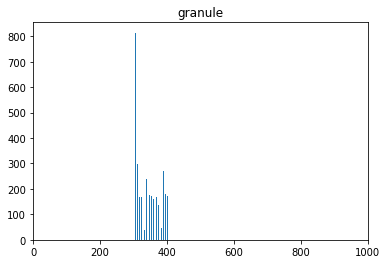

Plotting PSTH for golgi


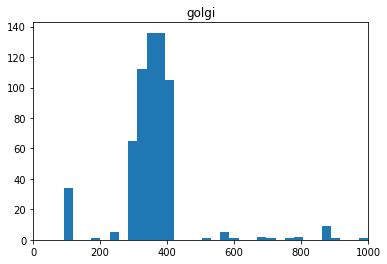

Plotting PSTH for glomerulus


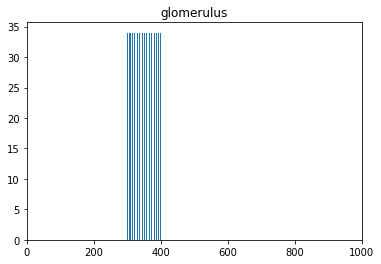

Plotting PSTH for basket


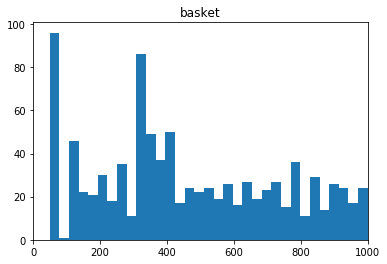

Plotting PSTH for dcn


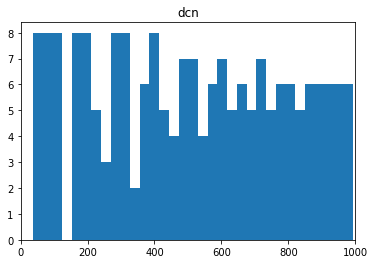

Plotting PSTH for purkinje


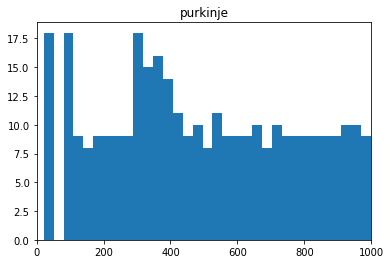

Plotting PSTH for stellate


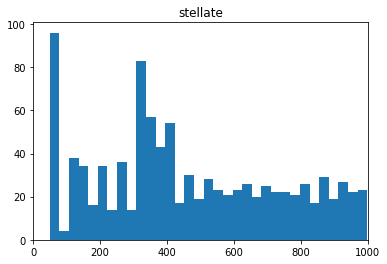

In [29]:
for cell in cell_type:
    print("Plotting PSTH for", cell)
    plot_psth(cell, '158')

Plotting PSTH for granule


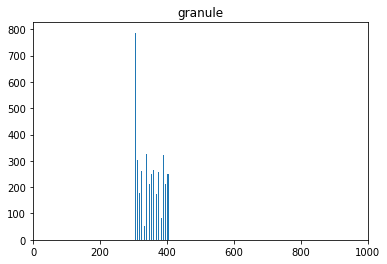

Plotting PSTH for golgi


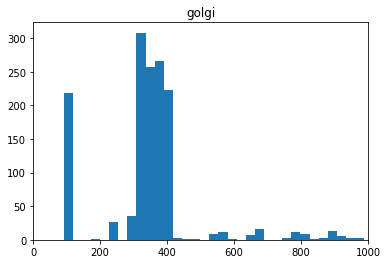

Plotting PSTH for glomerulus


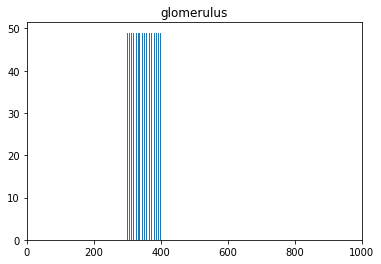

Plotting PSTH for basket


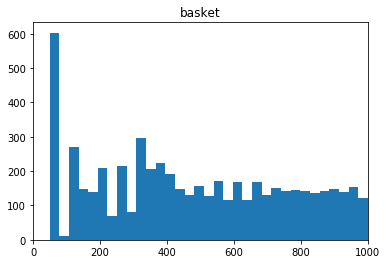

Plotting PSTH for dcn


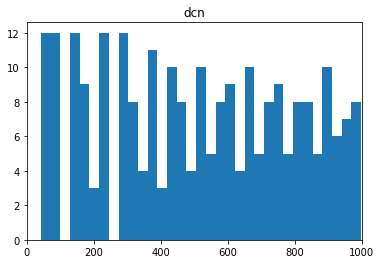

Plotting PSTH for purkinje


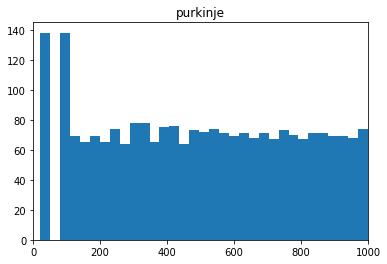

Plotting PSTH for stellate


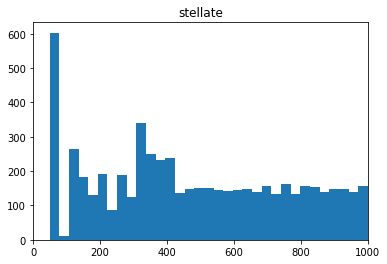

In [30]:
for cell in cell_type:
    print("Plotting PSTH for", cell)
    plot_psth(cell, '400')